In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('data'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
from tools import clean_sqft_basement

In [3]:
data = pd.read_csv('data/kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
data.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
from tools import print_column_info
#for column in columns_of_interest:
#    print("Column: ", column, "\n")
#    print_column_info(data[column])

In [7]:
data = data.set_index('price').reset_index()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
data.dtypes

price            float64
id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
data.isna().sum()

price               0
id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
data.isna().sum()/data.shape[0]

price            0.000000
id               0.000000
date             0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [12]:
print_column_info(data.waterfront)

Unique values:
 [nan  0.  1.]
Value_counts:
 0.0    19075
1.0      146
Name: waterfront, dtype: int64
Number of Null values:
 2376


In [13]:
data.sqft_basement = data.sqft_basement.apply(clean_sqft_basement)

In [14]:
data.head()

,price,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,5631500400,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [15]:
data[data.waterfront.isna()]= 0.0

In [16]:
data.head()

,price,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.0,0,0,0,0.00,0,0,0.0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0000,0.000,0,0
1,538000.0,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,5631500400,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:ylabel='Density'>

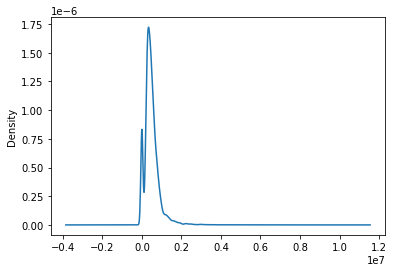

In [17]:
data['price'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

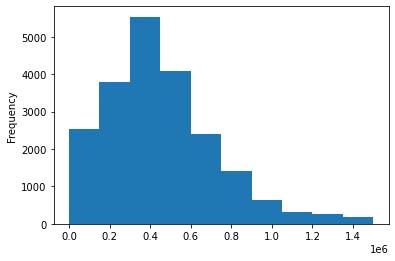

In [18]:
data.drop(data[data.price > 1.5*10**6].index, inplace=True)
data['price'].plot.hist()

<AxesSubplot:ylabel='Density'>

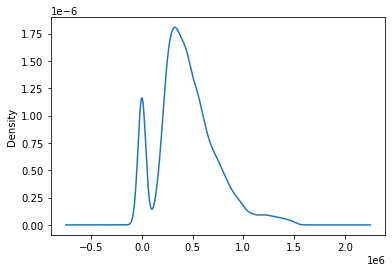

In [19]:
data['price'].plot.kde()

1796.01206586543 1006.6226075131251


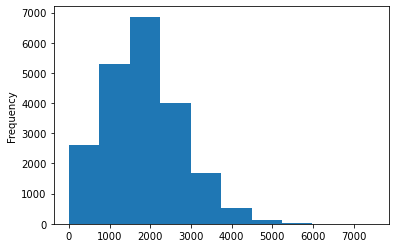

In [20]:
data['sqft_living'].plot.hist()
print(data.sqft_living.mean(), data.sqft_living.std())
idx = data[data['sqft_living'] > 8000].index
data.drop(idx, inplace=True)

In [87]:
idx = data[data['sqft_living']==0].index
data.drop(idx,inplace=True)
idx = data[data['price']==0].index
data.drop(idx,inplace=True)

<AxesSubplot:ylabel='Frequency'>

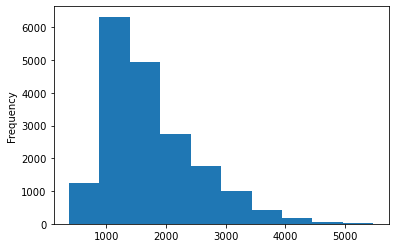

In [88]:
data['sqft_above'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

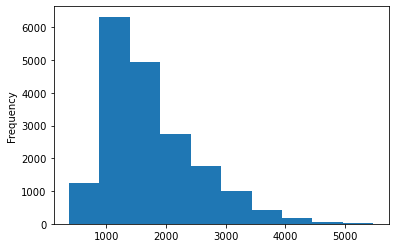

In [89]:
idx = data[data.sqft_above > 5500].index
data.drop(idx,inplace=True)
data.sqft_above.plot.hist()

In [90]:
print_column_info(data['view'])

Unique values:
 [0. 3. 2. 4. 1.]
Value_counts:
 0.0    17093
2.0      782
3.0      371
1.0      265
4.0      185
Name: view, dtype: int64
Number of Null values:
 0


In [91]:
data[data.view.isna()] = 0

/Users/yevgeniykostrov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

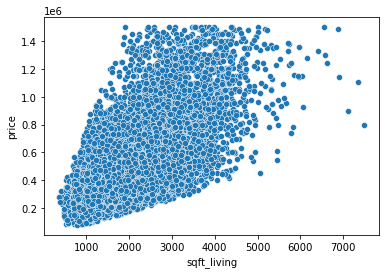

In [92]:
sns.scatterplot(data.sqft_living, data.price)

                  price        id  bedrooms  bathrooms  sqft_living  sqft_lot  \
price          1.000000 -0.005196  0.311448   0.485708     0.655994  0.089835   
id            -0.005196  1.000000  0.007838   0.016963    -0.002276 -0.134727   
bedrooms       0.311448  0.007838  1.000000   0.503575     0.586178  0.026593   
bathrooms      0.485708  0.016963  0.503575   1.000000     0.730740  0.072096   
sqft_living    0.655994 -0.002276  0.586178   0.730740     1.000000  0.165186   
sqft_lot       0.089835 -0.134727  0.026593   0.072096     0.165186  1.000000   
floors         0.280738  0.023185  0.168858   0.507192     0.351272 -0.015347   
waterfront     0.090042  0.001594 -0.036189   0.001249     0.007489  0.025366   
view           0.306300  0.020829  0.055551   0.125590     0.211358  0.070852   
condition      0.034037 -0.022690  0.022241  -0.137215    -0.070582 -0.011132   
grade          0.665825  0.020083  0.339561   0.634288     0.732024  0.101265   
sqft_above     0.559694 -0.0

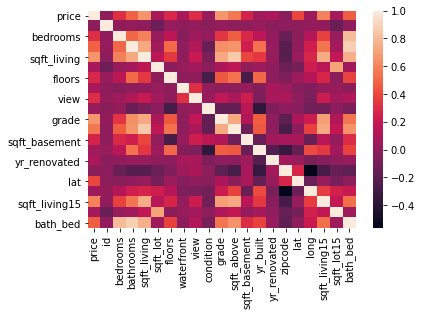

In [259]:
data['bath_bed'] = data.bathrooms * data.bedrooms
corr = data.corr()
sns.heatmap(corr)
print(corr)

In [94]:
df = data[['price','bedrooms',
           'bathrooms','sqft_living',
           'view','grade','sqft_above',
           'floors','sqft_basement',
           'condition','bath_bed',
          'sqft_living15']]

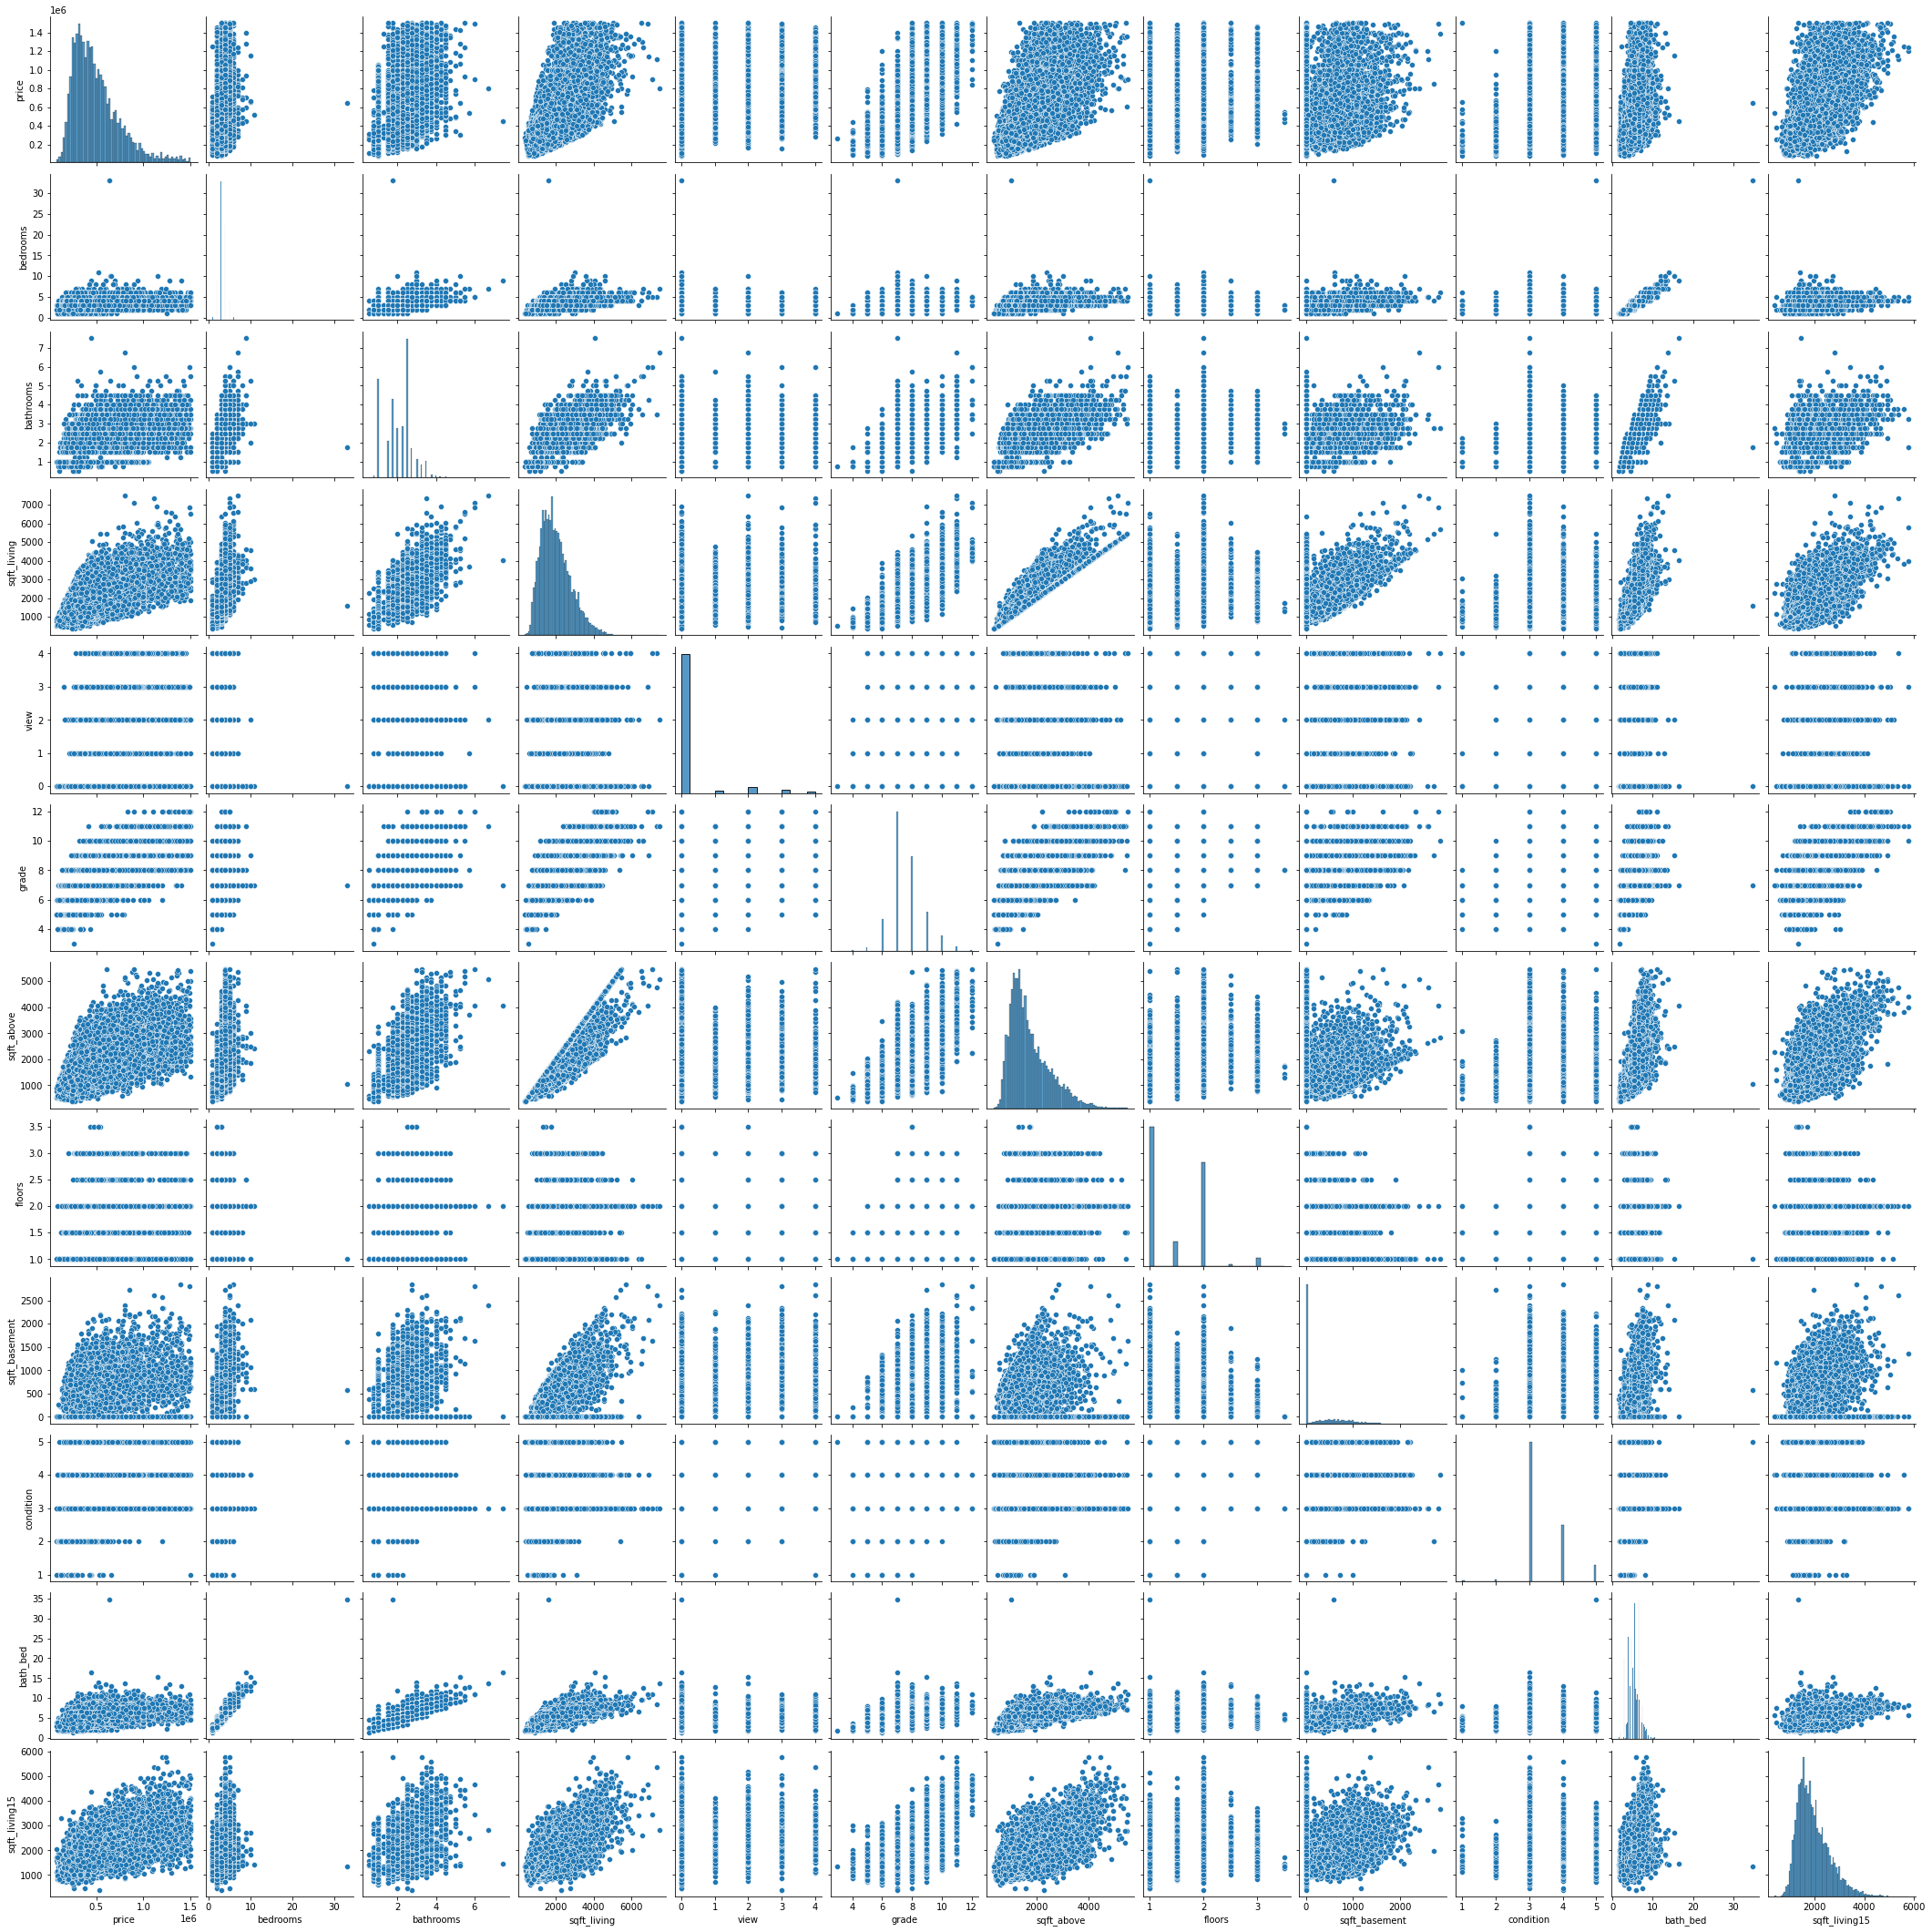

In [95]:
sns.pairplot(df)

In [244]:
new_df = df[['price','sqft_living']]
new_df = new_df.dropna()
fitted_data, fitted_lambda = stats.boxcox(new_df['sqft_living'])
new_df['sqft_living'] = fitted_data
#new_df['price'], fitted_lambda = stats.boxcox(new_df.price)
#new_df.price = new_df.price**4
#new_df.grade = new_df.grade**2
#new_df.sqft_living = new_df.sqft_living**1.1
#new_df.price = np.log(new_df.price)
#new_df.sqft_living = new_df.sqft_living / new_df.sqft_living.max()
new_df.head()

,price,sqft_living
1,538000.0,14.388097
2,180000.0,11.026245
3,604000.0,13.581645
4,510000.0,13.136449
5,1230000.0,16.775431


In [245]:
formula = 'price~sqft_living'
fsm = ols(formula=formula, data=new_df).fit()
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                 1.215e+04
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:10:34   Log-Likelihood:            -2.5413e+05
No. Observations:               18696   AIC:                         5.083e+05
Df Residuals:                   18694   BIC:                         5.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.282e+06   1.62e+04    -78.922      0.000   -1.31e+06   -1.25e+06
sqft_living  1.324e+05   1201.429    110.222      0.000     1.3e+05    1.35e+05
==============================================================================
Omnibus:                     2505.452   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4219.008
Skew:                           0.908   Prob(JB):                         0.00
Kurtosis:                       4.455   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Evaluation

We are only explaining about 59% of the variance in price, for the only feature "sqft_living" and it is statistically significant at an $\alpha =0.05$
<br>
We claim that according to our model:
* our intercept is negative
* if we increase square footage of the living area by 1ft the price of the house will go up by 275 dollars.

In [246]:
rsquared = fsm.rsquared
params = fsm.params

print(f'Rsquared of FSM: {rsquared}')
print('----------')
print('Beta values of FSM:')
print(params)

Rsquared of FSM: 0.39389622062419016
----------
Beta values of FSM:
Intercept     -1.282104e+06
sqft_living    1.324240e+05
dtype: float64


In [247]:
from statsmodels.stats.diagnostic import linear_rainbow

# Your code here
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm)
print("Statistic =", rainbow_statistic, "P_Value =", rainbow_p_value)

Statistic = 1.0082051357405317 P_Value = 0.3464194161104774


The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. Thus returning a low p-value means that the current model violates the linearity assumption. 
* Since our P_value is very small we reject the Null_Hypothesis and conclude the model violates the linearity assumption

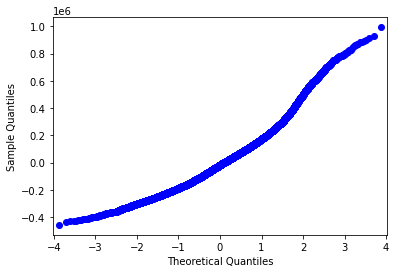

In [248]:
# Create a qq-plot
y_hat = fsm.predict()
fsm_resids = df['price'] - y_hat

sm.qqplot(fsm_resids);

# Normaility 
The Jarque-Bera test is performed:
The Null_Hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. Thus returning a low p-value means that the current model violates the normality assumption.

In [249]:
y = df['price']
y_hat = fsm.predict()
type(y_hat)

numpy.ndarray

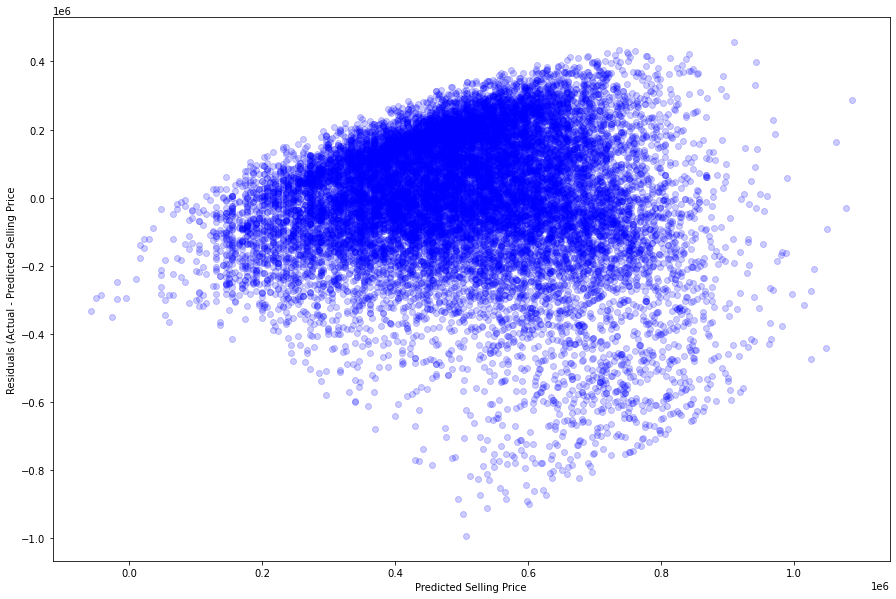

In [250]:
fig2, ax2 = plt.subplots(figsize=(15,10))
ax2.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax2.scatter(x=y_hat,y=y_hat-y, color='blue', alpha=0.2);

In [251]:
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(fsm_resids, new_df[["price"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


In [252]:
def formula(df, target):
    columns = df.drop(target, axis=1).columns
    right_side = " + ".join(columns)
    return target + "~" + right_side

In [253]:
f = formula(df[['price','sqft_living','grade']], 'price')

In [254]:
model = sm.OLS.from_formula(f,data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     9519.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:10:53   Log-Likelihood:            -2.5224e+05
No. Observations:               18696   AIC:                         5.045e+05
Df Residuals:                   18693   BIC:                         5.045e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.102e+05   1.02e+04    -40.108      0.000    -4.3e+05    -3.9e+05
sqft_living   109.9290      2.287     48.069      0.000     105.446     114.412
grade        9.081e+04   1715.943     52.923      0.000    8.75e+04    9.42e+04
==============================================================================
Omnibus:                     2825.088   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5524.744
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                       4.887   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Evaluation

In [255]:
rainbow_statistic, rainbow_p_value = linear_rainbow(result)
print("Statistic =", rainbow_statistic, "P_Value =", rainbow_p_value)

Statistic = 1.005911944598168 P_Value = 0.3878507998758589


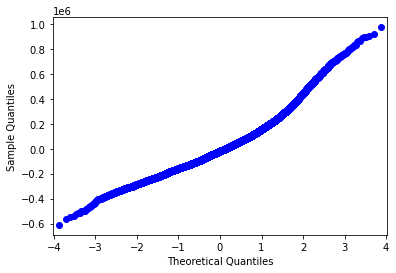

In [256]:
y_hat = result.predict()
fsm_resids = df['price'] - y_hat

sm.qqplot(fsm_resids);

In [257]:
y = df['price']
y_hat = result.predict()
result.predict()

array([507990.30450995, 219304.50357392, 440933.63324273, ...,
       570222.4287075 , 337600.40210964, 337600.40210964])

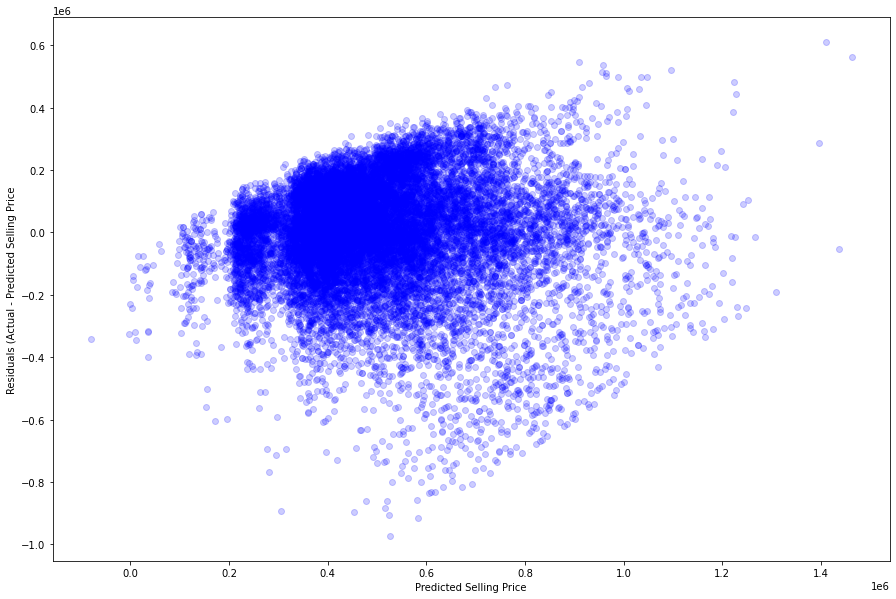

In [258]:
fig3, ax3 = plt.subplots(figsize=(15,10))
ax3.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax3.scatter(x=y_hat,y=y_hat-y, color='blue', alpha=0.2);

In [274]:
new_df = df[['price','sqft_living','grade', 'sqft_living15','bath_bed']]
f = formula(new_df, 'price')

In [275]:
model = sm.OLS.from_formula(f,data=new_df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     4896.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:18:47   Log-Likelihood:            -2.5211e+05
No. Observations:               18696   AIC:                         5.042e+05
Df Residuals:                   18691   BIC:                         5.043e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.579e+05   1.09e+04    -32.881      0.000   -3.79e+05   -3.37e+05
sqft_living     115.0117      3.224     35.669      0.000     108.692     121.332
grade          8.406e+04   1798.344     46.742      0.000    8.05e+04    8.76e+04
sqft_living15    35.2009      3.141     11.206      0.000      29.044      41.358
bath_bed      -1.474e+04   1343.409    -10.970      0.000   -1.74e+04   -1.21e+04
==============================================================================
Omnibus:                     2809.749   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5505.386
Skew:                           0.934   Prob(JB):                         0.00
Kurtosis:                       4.891   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [276]:
rainbow_statistic, rainbow_p_value = linear_rainbow(result)
print("Statistic =", rainbow_statistic, "P_Value =", rainbow_p_value)

Statistic = 1.007398230983341 P_Value = 0.36081801469641095


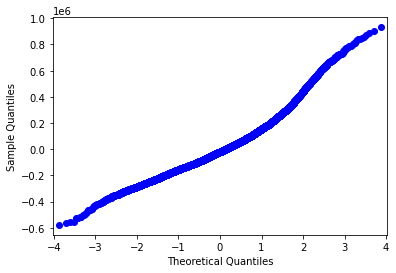

In [267]:
y_hat = result.predict()
fsm_resids = df['price'] - y_hat

sm.qqplot(fsm_resids);

In [268]:
y = new_df['price']
y_hat = result.predict()
result.predict()

array([508214.69616541, 286551.9998988 , 400650.89097558, ...,
       548875.73130578, 343205.39010368, 343205.39010368])

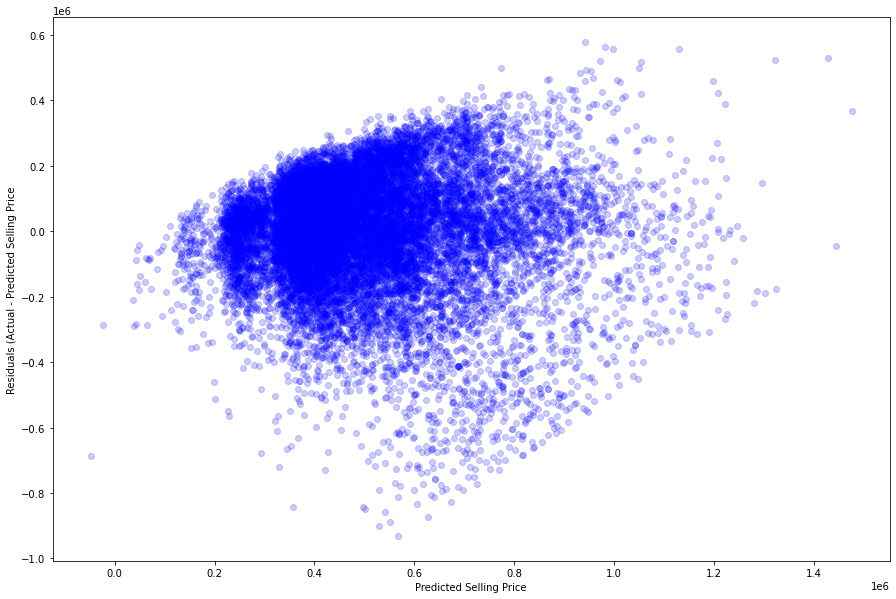

In [269]:
fig4, ax4 = plt.subplots(figsize=(15,10))
ax4.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax4.scatter(x=y_hat,y=y_hat-y, color='blue', alpha=0.2);